In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
#Reading the CSV files and loading them into the data frames.

books = pd.read_csv("books.csv")
book_tags = pd.read_csv("book_tags.csv")
ratings = pd.read_csv("ratings.csv")

In [103]:
#finding out the cooks without an original title.

books_without_title = books["original_title"].isnull().sum()
print(f"Number of books without an original title: {books_without_title}")

Number of books without an original title: 36


In [104]:
# removing records with null original_title from books.csv and corresponding records
books_cleaned = books.dropna(subset=["original_title"])
book_tags_cleaned = book_tags[book_tags["goodreads_book_id"].isin(books_cleaned["book_id"])]
ratings_cleaned = ratings[ratings["book_id"].isin(books_cleaned["book_id"])]

#counting the unique books
unique_books = len(books_cleaned["book_id"].unique())
print(f"Number of unique books: {unique_books}")

Number of unique books: 363


In [105]:
# counting the unique users in ratings.csv
unique_users = len(ratings["user_id"].unique())
print(f"Number of unique users: {unique_users}")

Number of unique users: 40836


In [106]:
#counting the unique tags in book_tags.csv
unique_tags = len(book_tags["tag_id"].unique())
print(f"Number of unique tags: {unique_tags}")

Number of unique tags: 3651


In [107]:
# Finding the tag_id with the highest count
tag_counts = book_tags["tag_id"].value_counts()
most_used_tag_id = tag_counts.idxmax()  # Tag ID with the highest count
print(f"Tag ID most frequently used: {most_used_tag_id}")

Tag ID most frequently used: 4600


In [108]:
# Merge datasets on 'goodreads_book_id'
merged_data = pd.merge(book_tags, books, how='inner', left_on='goodreads_book_id', right_on='book_id')

# Group by book title and count the number of tags
tag_counts = merged_data.groupby('title')['count'].sum().reset_index()

# Find the book with the most tags
most_tags_book = tag_counts.loc[tag_counts['count'].idxmax()]

print(f"The book with the most tags is '{most_tags_book['title']}' with {most_tags_book['count']} tags.")


The book with the most tags is 'Beyond Band of Brothers: The War Memoirs of Major Dick Winters' with 24348 tags.


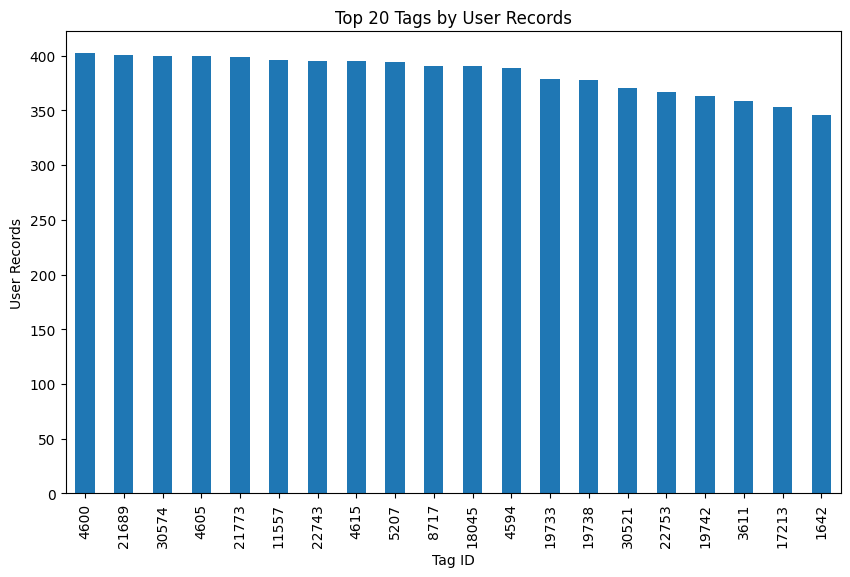

In [109]:
#descending order of ‘user records'
top_20_tags = book_tags["tag_id"].value_counts().head(20)
top_20_tags.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Tag ID")
plt.ylabel("User Records")
plt.title("Top 20 Tags by User Records")
plt.show()